In [ ]:
###############################################################################
# Information
###############################################################################
# Created by Linwood Creekmore III 

# Notebook to demonstrate interactive examples of Andreas Mueller's wordcloud module (https://github.com/amueller/word_cloud).

# February 15, 2016

# https://github.com/linwoodc3
# https://plus.google.com/+LinwoodCreekmoreIII/

###  Start hitting the `play` button from here

In [4]:
###############################################################################
# Importing modules required for wordcloud; this box is essential to loading the dependencies
###############################################################################

try:
    import numpy as np
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e

try:
    from PIL import Image
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e
    
try:
    import os
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e
    
try:
    from os import path
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e
    
try:
    import random
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e
    
try:
    import matplotlib.pyplot as plt
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e
    
try:
    from wordcloud import WordCloud, STOPWORDS
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e
    
try:
    from sklearn.feature_extraction import stop_words
except Exception, e:
    print 'You need to install the module using \'pip install\' or setup.py install!', e    

%matplotlib inline

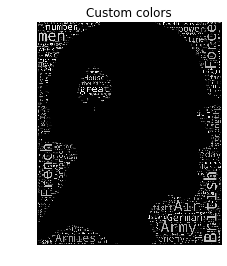

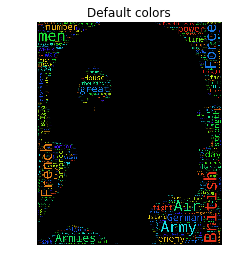

In [3]:
###############################################################################
# Code to create a wordcloud from Churchill speech; taken from stormtrooper example
###############################################################################


def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

d = path.dirname('../examples/soldier.png')

# read the mask image
# taken from
# http://svejer.com/wp-content/uploads/2015/12/us-world-war-two-soldier-silhouette.png
mask = np.array(Image.open(path.join(d, "soldier.png")))

# Speech transcript taken from
# http://www.winstonchurchill.org/resources/speeches/128-we-shall-fight-on-thebeaches
# May the lawyers deem this fair use.
text = open("../examples/churchill_weshallfightonthebeaches.txt").read()

# adding speech specific stopwords
newstop = set([l for l in stop_words.ENGLISH_STOP_WORDS])
stopwords = newstop
stopwords.add("shall")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))

# create a folder to store data
if not os.path.exists('./notebookoutput'):
    os.makedirs('./notebookoutput')

wc.to_file("./notebookoutput/churchill_speech.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors)
plt.axis("off")
plt.show()